<a href="https://colab.research.google.com/github/Zaier9/Practicas-en-Colab/blob/main/Trabajando_con_TENSORFLOW_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coast',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

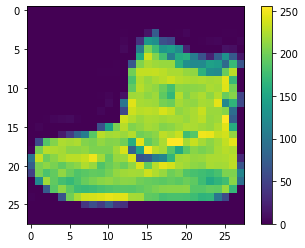

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

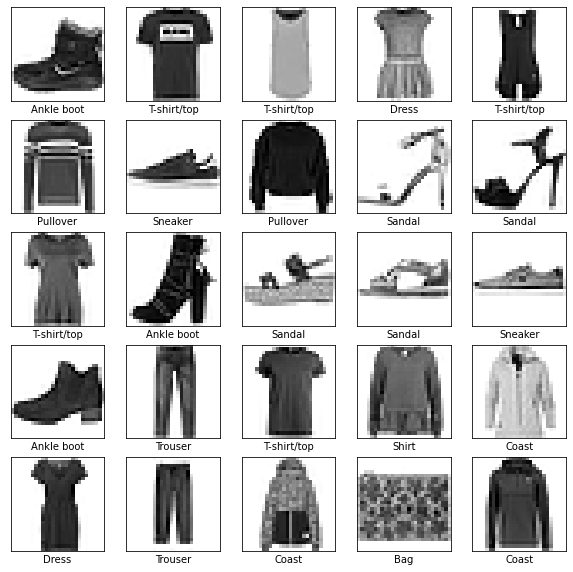

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4947 - accuracy: 0.8266
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3745 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3357 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3106 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2926 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2792 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2662 - accuracy: 0.9019
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2580 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2464 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy', test_acc)

313/313 - 0s - loss: 0.3506 - accuracy: 0.8785

Test accuracy 0.8784999847412109


In [13]:
predictions = model.predict(test_images)
predictions[0]

array([1.6940135e-06, 3.5255647e-09, 3.3609382e-08, 5.3805299e-10,
       1.1114740e-08, 1.0639572e-03, 7.7389205e-07, 2.1709554e-02,
       1.8877667e-07, 9.7722375e-01], dtype=float32)

In [14]:
np.argmax(predictions[0])

9

In [15]:
test_labels[0]

9

In [16]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


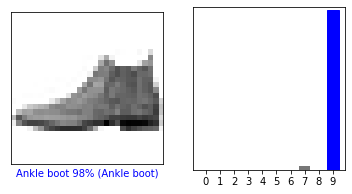

In [17]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

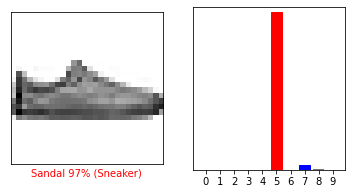

In [18]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


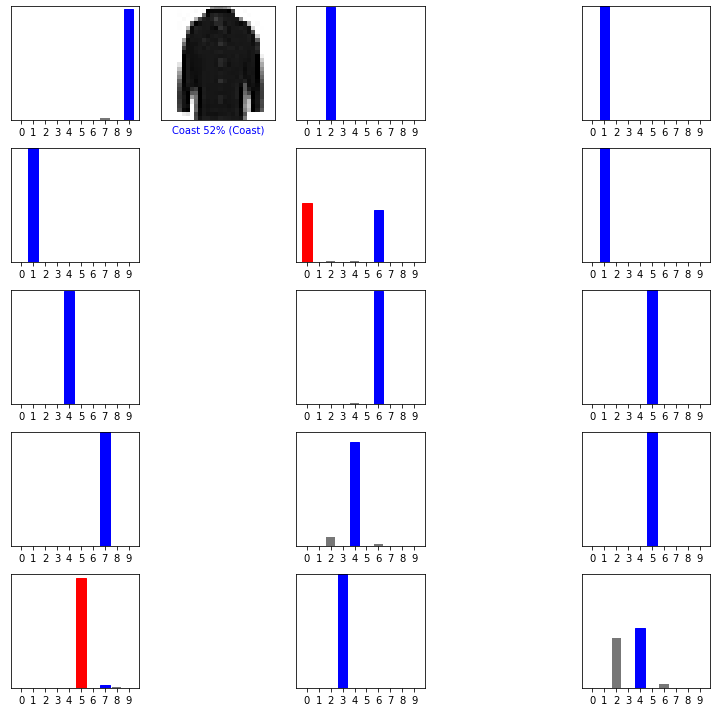

In [19]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*1+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [20]:
img = test_images[0]
print(img.shape)

(28, 28)


In [21]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [22]:
prediction_single = model.predict(img)
print(prediction_single)

[[1.6940180e-06 3.5255778e-09 3.3609506e-08 5.3805399e-10 1.1114780e-08
  1.0639600e-03 7.7389416e-07 2.1709589e-02 1.8877775e-07 9.7722363e-01]]


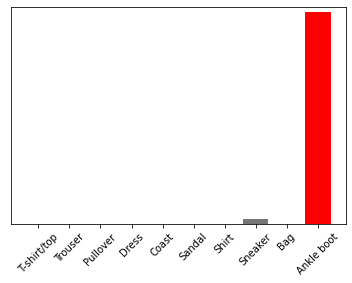

In [23]:
plot_value_array(1, prediction_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)